## TP6 (Utilisation Du perceptron Simple et Multicouche)
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217


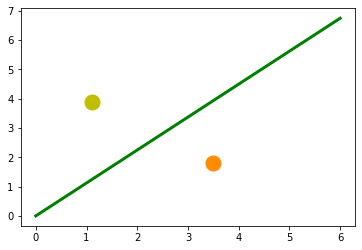

In [1]:
#Dans ce bout de code nous separons lineairement 2 points (3.5,1.8) et (1.1,1.9)
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0,7)
fig,ax = plt.subplots()

ax.plot(3.5,1.8,"or", color="darkorange",markersize=15)
ax.plot(1.1,3.9,"oy",markersize=15)

point_on_line = (4,4.5)
m=point_on_line[1] / point_on_line[0]
ax.plot(X,m*X,"g-",linewidth=3) ## ici on voit bien que tout point tel que m*a1 -a2 !=0 n'est pas sur la droite(ou A=(a1,a2) et un point)
plt.show()

In [2]:
## Ici nous allons verifier si les proprites pour nos points que sont pour un point P(p1,p2) :
## en-dessous de la droite m.p1 -p2>0, sur la ligne droite m.p1 - p2 =0, au-dessus de la ligne droite m.p1-p2<0
##sont vraies

lemon =(1.1,3.9)
orange = (3.5,1.8)
m = 4.5/4

print(orange[0]*m-orange[1])
print(lemon[0]*m-lemon[1])

2.1375
-2.6624999999999996


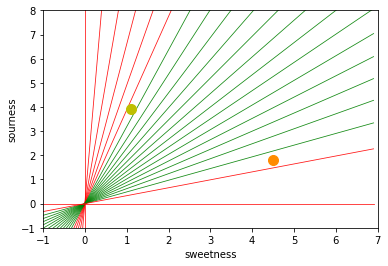

In [3]:
## Dans ce bout de code il est question de tracer plusieurs lignes questions de voir comment elles separent les fruits
##

def create_distance_function(a,b,c):
    
    def distance(x,y):
        """
            cette fonction retourne un tuple (d,pos) tel que d est la distance
            et si pos == -1 le point est au dessus de la ligne, 0 sur la ligne et 1 au dessus de
            la ligne
        """
        
        nom = a*x + b*y +c
        if nom ==0:
            pos =0
        elif(nom<0 and b<0) or (nom>0 and b>0):
            pos =0
        else:
            pos =1
        return (np.absolute(nom)/np.sqrt(a ** 2 + b**2),pos)
    return distance

orange =(4.5,1.8)
lemon = (1.1,3.9)
fruits_coords =[orange,lemon]
fig,ax =plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")

x_min, x_max = -1,7
y_min,y_max =-1,8
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])

X = np.arange(x_min,x_max,0.1)
step = 0.05

for x in np.arange(0,1+step,step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope,-1,0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if(results[0][1] != results[1][1]):
        ax.plot(X,Y,"g-",linewidth=0.8,alpha=0.9)
    else:
        ax.plot(X,Y,"r-",linewidth=0.8,alpha=0.9)

size = 10

for (index,(x,y)) in enumerate(fruits_coords):
    if index==0:
        ax.plot(x,y,"o",color="darkorange",markersize=size)
    else:
        ax.plot(x,y,"oy",markersize=size)

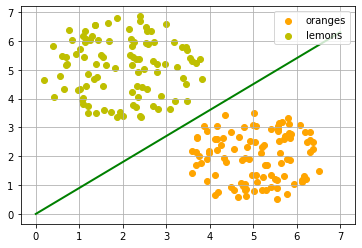

In [4]:
## dans cette section, nous creons 2 classes et augmentons le nombre d<oranges et de lemons

def points_within_circle(radius,center=(0,0), number_of_points = 100):
    center_x,center_y = center
    r= radius *np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x,y

X = np.arange(0,8)
fig,ax = plt.subplots()
oranges_x,oranges_y = points_within_circle(1.6,(5,2),100)
lemons_x,lemons_y = points_within_circle(1.9,(2,5),100)
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label ="lemons")
ax.plot(X,0.9 * X, "g-",linewidth=2)

ax.legend()
ax.grid()
plt.show()

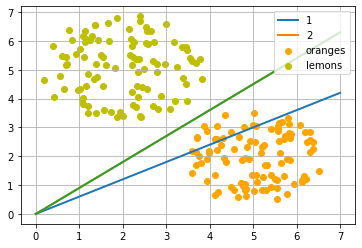

In [5]:
## Dans ce bout de code on veut faire en sorte d'ajuster le 
# pente d'une droite de sorte a faire passer si on le veut des point qu dessus ou en dessous d'une droite 
from itertools import repeat
from random import shuffle

X = np.arange(0,8)
fig,ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
fruits = list(zip(oranges_x,oranges_y,repeat(0,len(oranges_x))))
fruits += list(zip(lemons_x,lemons_y,repeat(1,len(oranges_x))))

shuffle(fruits)

def adjust(learning_rate = 0.3, slope=0.3):
    line = None
    counter = 0
    for x,y,label in fruits:
        res = slope *x -y
        if label == 0 and res<0:
            ## le point est en dessous de la ligne on incremente la pente
            slope += learning_rate
            counter += 1
            ax.plot(X, slope*X,linewidth=2,label = str(counter))
        elif label == 1 and res >0:
            ## le point est au dessus de la ligne on decremente la pente
            slope -= learning_rate
            counter += 1
            ax.plot(X,slope*X,linewidth=2,label = str(counter))
    return slope

slope = adjust()
ax.plot(X,slope*X,linewidth=2)
ax.legend()
ax.grid()
plt.show()

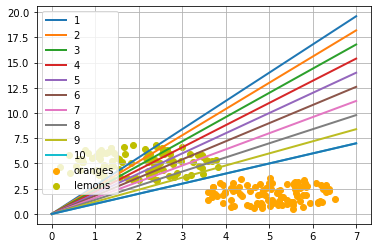

0.9999999999999996


In [6]:
## ici nous voulons modifier la pente afin de creer de nouvelles droites dans la section des lemon
X = np.arange(0,8)
fig,ax = plt.subplots()

ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")

slope = adjust(learning_rate = 0.2,slope=3)
ax.plot(X,slope*X,linewidth=2)
ax.legend()
ax.grid()
plt.show()

print(slope)

In [7]:
class Perceptron:
    def __init__(self,weights):
        self.weights = np.array(weights)
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum

p = Perceptron(weights = [-0.45,0.5])

for point in zip(oranges_x[:10],oranges_y[:10]):
    res = p(point)
    print(res,end=", ")

for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end =", ")

-0.22292215243005042, -1.744894679907583, -0.9703787303119706, -1.2059049928214227, -1.860345770274551, -2.255393560103059, -1.2517601254181128, -1.8787223265249744, -1.0230585076927865, -1.4183601601772864, 1.7462072983560675, 1.4239436045501084, 1.842491847351349, 1.8543404614759624, 2.5004362973378687, 0.5141185410677105, 1.8322334333231314, 2.080655135830834, 0.623906183067036, 2.236180014658515, 

In [8]:
from collections import Counter
evaluation = Counter()

for point in zip(oranges_x,oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
    
for point in zip(lemons_x,lemons_y):
    res = p(point)
    if res >=0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] +=1

print(evaluation)

Counter({'corrects': 200})


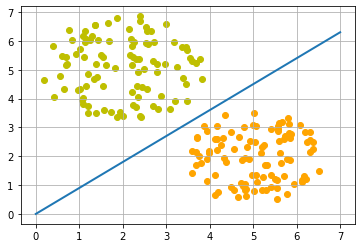

0.9


In [9]:
import time
slope = 0.1

X = np.arange(0,8)
fig,ax=plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = 0.45/0.5
ax.plot(X,slope*X,linewidth=2)

ax.grid()
plt.show()
print(slope)

In [10]:
from sklearn.model_selection import train_test_split
import random

oranges= list(zip(oranges_x,oranges_y))
lemons = list(zip(lemons_x,lemons_y))

labelled_data = list(zip(oranges+lemons,[0]*len(oranges) +[1]*len(lemons)))

random.shuffle(labelled_data)

data,labels = zip(*labelled_data)
res = train_test_split(data, labels,train_size  =0.8,test_size = 0.2,random_state =42)
train_data,test_data,train_labels,test_labels=res
print(train_data[:10],train_labels[:10])

[(5.840435028757261, 2.646646603990321), (1.0840139012012426, 6.174047925184414), (6.381157083329837, 2.2532520151816877), (3.555723740268993, 5.394738224021704), (5.182671275943024, 2.099863124259553), (2.406498116655509, 6.855406890868299), (5.538373767957096, 0.899424707459384), (5.048308424140813, 2.5006680704849042), (6.189829855331484, 2.853391887635417), (4.548454783765191, 0.8312542021545668)] [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [11]:
## on met a jour ici les poids en fonction des erreur possibles issu de la prediction
## formule wi = wi +dela*wi
class Perceptron:
    def __init__(self,weights,learning_rate=0.1):
        ## on utilisera la taille des poids pour definir le valeurs d'entrees
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x<0:
            return 0
        else:
            return 1
    def __call__(self,in_data):
        weighted_input = self.weights*in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self,target_result,calculated_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data *self.learning_rate
            self.weights += correction
            
    def evaluate(self,data,labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] +=1
        return evaluation
p= Perceptron(weights=[0.1,0.1],learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
            p(train_data[index]),
            train_data[index])
    
evaluation = p.evaluate(train_data,train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data,test_labels)
print(evaluation.most_common())

print(p.weights)

[('wrong', 83), ('correct', 77)]
[('correct', 25), ('wrong', 15)]
[-0.28360795  2.33629718]


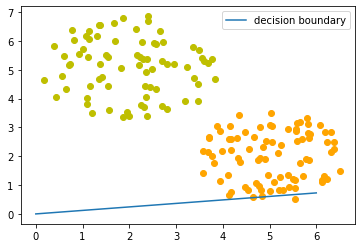

[-0.28360795  2.33629718]


In [12]:
### maintenant representons notre ligne de decision pour nos donnees

X = np.arange(0,7)
fig,ax= plt.subplots()

lemons =[train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x,lemons_y=zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] ==0]
oranges_x,oranges_y = zip(*oranges)

ax.scatter(oranges_x,oranges_y,c="orange")
ax.scatter(lemons_x,lemons_y,c="y")

w1 = p.weights[0]
w2 = p.weights[1]

m = -w1/w2
ax.plot(X,m*X,label= "decision boundary")
ax.legend()
plt.show()
print(p.weights)

0 -2.380612157150637 [-1.65213051 -0.69399398] (5.840435028757261, 2.646646603990321)
1 1.1456596192219 [-1.32692634  1.1582204 ] (1.0840139012012426, 6.174047925184414)
159 0.12139206927712998 [-0.28360795  2.33629718] (3.4777279637050444, 3.9269226129292063)


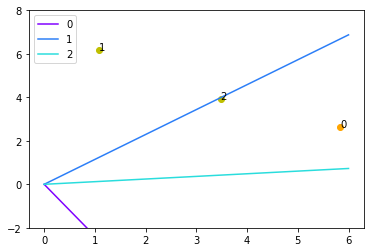

In [13]:
## regardons notre algorithme en mouvement avec changement de pentes
## dans ce bout de code chacun des point modifi la pente de la droite d'origine et ce changement est ainsi numerote our chaque points
import matplotlib.cm as cm

p = Perceptron(weights=[0.1,0.1], learning_rate =0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0,1,number_of_colors))

fig,ax =plt.subplots()

ax.set_xticks(range(8))

ax.set_ylim([-2,8])

counter = 0

for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],p(train_data[index]), train_data[index])
    
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] ==0 else "y"
        ax.scatter(train_data[index][0],train_data[index][1],color=color)
        ax.annotate(str(counter),(train_data[index][0],train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index,m,p.weights,train_data[index])
        ax.plot(X,m*X,label=str(counter),color=colors[counter])
        counter +=1

ax.legend()
plt.show()

## 2. Simple Reseaux de neuronnes

[]

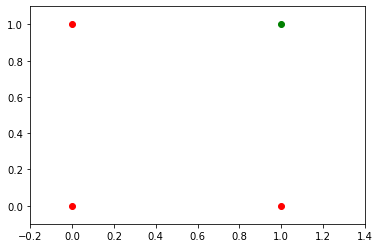

In [14]:
## ici on implemente les point constituant la fonction logique Et
fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4

X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m=-1
plt.plot()

[]

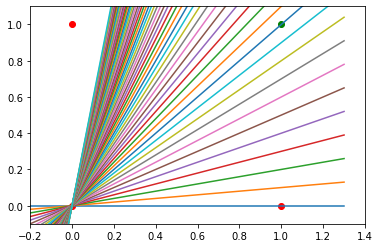

In [15]:
#creons plusieurs droites pour notre Fonction logique And

fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4
X = np.arange(xmin,xmax,0.1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])

m=-1
for m in np.arange(0,6,0.1):
    ax.plot(X,m*X)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
plt.plot()

In [16]:
#nous remarquons qu'aucun separateur ne seapre bien les classes
# il nous faut une droit y=m*x + c(intercepteur) avec c different de 0

[]

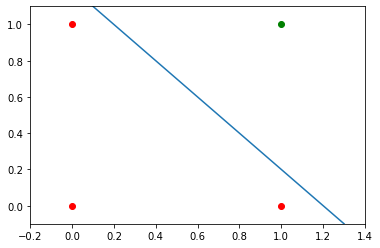

In [17]:
fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4

X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")

ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m,c = -1,1.2
ax.plot(X, m*X + c)
plt.plot()

In [18]:
# ici nous voulons creer un model qui permet le moins de modifications possible dans notre reseau de neuronnes
# pour cela on vas ajouter un biaias b(qui est constant) en entrees on pourra determiner la droite de decision avec un intercepteur c non null

import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self,weights,bias=1,learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if x<=0:
            return 0
        else:
            return 1
    
    def __call__(self, in_data):
        in_data= np.concatenate((in_data,[self.bias]))
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self,target_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        
        if error != 0:
            in_data =np.concatenate((in_data, [self.bias]))
            correction = error * in_data *self.learning_rate
            self.weights += correction
    
    def evaluate(self,data,labels):
        evaluation =Counter()
        for sample,label in zip(data,labels):
            result = self(sample)
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [19]:
# ici nous evaluons notre modele
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0,2,(2,))
        yield(s,1) if s[0] == 1 and s[1] == 1 else (s,0)

p = Perceptron(weights=[0.3,0.3,0.3], learning_rate=0.2)

for in_data,label in labelled_samples(30):
    p.adjust(label,in_data)

test_data,test_labels = list(zip(*labelled_samples(30)))
evaluation =p.evaluate(test_data,test_labels)
print(evaluation)

Counter({'correct': 30})


-1.0 1.0000000000000007


[]

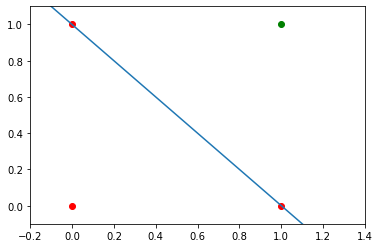

In [20]:
## affichons notre graphique base sur le perceptron avec bias

fig,ax = plt.subplots()
xmin,xmax = -0.2,1.4
X = np.arange(xmin,xmax,0.1)
ax.scatter(0,0,color="r")
ax.scatter(0,1,color="r")
ax.scatter(1,0,color="r")
ax.scatter(1,1,color="g")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
"""
 calcul de c et de m
"""
m=-p.weights[0] / p.weights[1]
c=-p.weights[2] / p.weights[1]

print(m,c)
ax.plot(X,m * X + c)
plt.plot()

In [21]:
## ici on veut tracer un perceptron qui separe des donnees sur un dataset de sklearn

from sklearn.datasets import make_blobs

n_samples = 250

samples,labels = make_blobs(n_samples=n_samples,centers=([2.5,3],[6.7,7.9]), random_state =0)

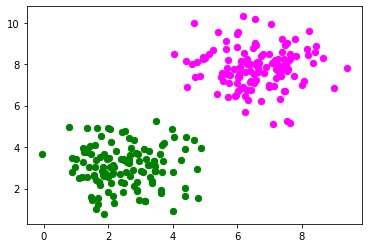

In [22]:
# ici nous representons nos donnees
colours = ('green','magenta','blue','cyan','yellow','red')
fig,ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:,0],samples[labels==n_class][:,1],
              c=colours[n_class],s=40,label=str(n_class))
    

In [23]:
n_learn_data = int(n_samples *0.8)
learn_data,test_data = samples[:n_learn_data],samples[-n_learn_data:]# decoupage des donnees

learn_labels,test_labels = labels[:n_learn_data], labels[-n_learn_data:] # decoupage des labels

p=Perceptron(weights = [0.3,0.3,0.3],learning_rate=0.8)

for sample, label in zip(learn_data,learn_labels):
    p.adjust(label,sample)

evaluation = p.evaluate(learn_data,learn_labels)

print(evaluation)

Counter({'correct': 200})


-1.5513529034664024 11.736643489707035


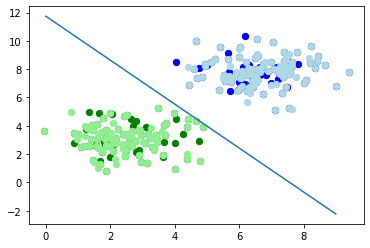

In [24]:
fig, ax= plt.subplots()
## affichage des donnees apprisent
colours = ("green",'blue')

for n_class in range(2):
    ax.scatter(learn_data[learn_labels == n_class][:,0],
               learn_data[learn_labels == n_class][:,1],
               c= colours[n_class],s=40,label=str(n_class))

colours = ('lightgreen','lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels == n_class][:,0],
               test_data[test_labels == n_class][:,1],
               c= colours[n_class],s=40,label=str(n_class))

X = np.arange(np.max(samples[:,0]))
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]

print(m,c)
ax.plot(X, m*X+c)
plt.plot()
plt.show()

In [25]:
## ici nous faisons L'esercice de classification avec la fontion logique AND respectant un tableau donne


p= Perceptron(weights=[0.3,0.3,0.3],bias = 1,learning_rate=0.2)
def class_examples(n):
    for i in range(n):
        s=np.random.random((2,))
        yield(s,1) if s[0]>=0.5 and s[1] >=0.5 else (s,0)
        ## ici yield sert de fonction de retour pour le tuple(s,1)

for in_data,label in class_examples(30):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*class_examples(60)))
evaluation = p.evaluate(test_data,test_labels) 
print(evaluation)

Counter({'correct': 43, 'wrong': 17})


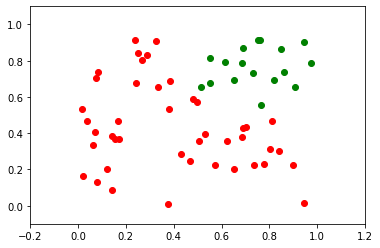

In [26]:
## maintenant observons pourquoi nos donnees ne sont pas lineairement separable

ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zereos = [test_data[i] for i in range(len(test_data)) if test_labels[i] ==0]

fig,ax = plt.subplots()
xmin,xmax =-0.2,1.2
X,Y = list(zip(*ones))
ax.scatter(X,Y,color='g')
X,Y  = list(zip(*zereos))
ax.scatter(X,Y,color="r")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]
X = np.arange(xmin,xmax,0.1)
ax.plot(X,m*X+c,label="decision boundary")

In [27]:
## observons la valeurs de x2 pour des donnees lineairement separaple en considerant le tableau precedant 

p= Perceptron(weights=[0.3,0.3,0.3],bias = 1,learning_rate=0.4)
def class_examples(n):
    for i in range(n):
        s=np.random.random((2,))
        yield(s,0) if s[0]<0.5 else (s,1)

for in_data,label in class_examples(300):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*class_examples(500)))
print(p.weights)
p.evaluate(test_data,test_labels)

[ 1.68959444  0.18023187 -0.9       ]


Counter({'correct': 484, 'wrong': 16})

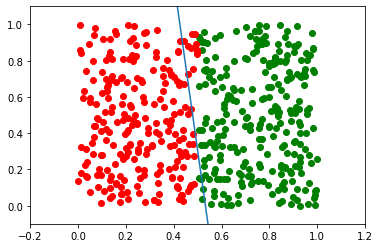

In [28]:
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zereos = [test_data[i] for i in range(len(test_data)) if test_labels[i] ==0]

fig,ax = plt.subplots()
xmin,xmax =-0.2,1.2
X,Y = list(zip(*ones))
ax.scatter(X,Y,color='g')
X,Y  = list(zip(*zereos))
ax.scatter(X,Y,color="r")
ax.set_xlim([xmin,xmax])
ax.set_ylim([-0.1,1.1])
m= -p.weights[0] / p.weights[1]
c= -p.weights[2] / p.weights[1]
X = np.arange(xmin,xmax,0.1)
ax.plot(X,m*X+c,label="decision boundary")

In [29]:
## ici on peut dire que la frontiere de decision separe bien nos donnees, et que 
## si x2 >= 0.5 on remarque que tous les points vert sont d'un cote

In [30]:
## comme technique d'attribution des poids en python vu que si les poids sont a 0 les poids ne peuvent etre mis a jours en cas d'erreur

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low,high,number_of_samples)
## on verifi effectivement si les valeurs sont bien dans l'intervalle
print(np.all(s>=-1) and np.all(s<0))

True


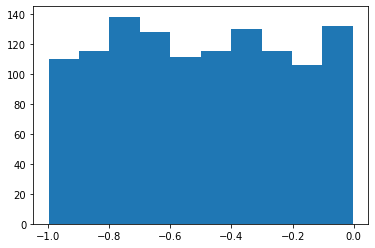

In [31]:
## affichons l'histogramme de notre distribution
plt.hist(s)
plt.show()

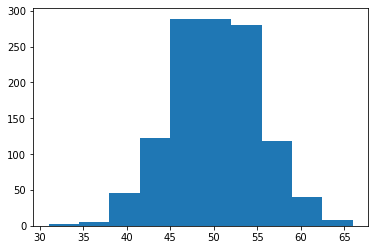

In [32]:
## on peut generer des nombres suivant une loi binomiale
## ici on une suite aletoire de taille 1200 suivant une loi binomiale
s=np.random.binomial(100,0.5,1200)
plt.hist(s)
plt.show()

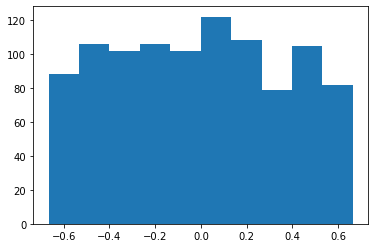

In [33]:
## Pour creer une suite de nombre suivant une loi de probabilite, nous pouvons utiliser truncnorm
## la forme standard normal tronque de la rangee [a,b], est utilisee pour truncnorm
from scipy.stats import truncnorm
s= truncnorm(a=-2/3.,b=2/3.,scale=1,loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

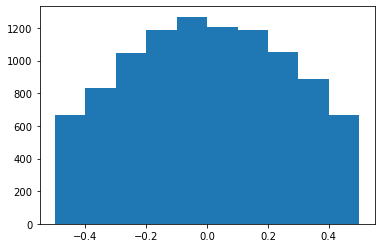

In [34]:
## vu que truncnorm est difficile a utiliser, nous allons  creer une fonction trucnorm
## nous avons pour formule a,b=(val_depart -moyenne)/ecart_type,(val_b_depart-moyenne)/ecart_type

def truncated_normal(mean=0,sd=1,low=0,upp=10):
    return truncnorm((low-mean)/sd,(upp-mean)/sd,loc=mean,scale=sd)

X = truncated_normal(mean=0,sd=0.4,low=-0.5,upp=0.5)
s =X.rvs(10000)## generation de 10000 valeur pour la distribution normale a valeur discretes 
plt.hist(s)
plt.show()

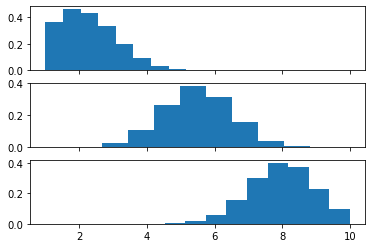

In [35]:
## autres exemples de valeurs avec trunc_normal 

X1 = truncated_normal(mean=2,sd=1,low=1,upp=10)
X2 = truncated_normal(mean=5.5,sd=1,low=1,upp=10)
X3 = truncated_normal(mean=8,sd=1,low=1,upp=10)

fig,ax= plt.subplots(3,sharex=True)
ax[0].hist(X1.rvs(10000),density=True)
ax[1].hist(X2.rvs(10000),density=True)
ax[2].hist(X3.rvs(10000),density=True)
plt.show()

In [36]:
## grace a trunc norm on vas creer une matrice de poids wih des couches d'entrees tel que: 
## whij appartient a [-1/sqrt(n),1/sqrt(n)];

no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1/np.sqrt(no_of_input_nodes)

X= truncated_normal(mean=2,sd=1,low=-rad,upp=rad)
wih= X.rvs((no_of_hidden_nodes,no_of_input_nodes))
wih

array([[ 0.14542685,  0.38422708,  0.55068083],
       [-0.12999052,  0.35092827,  0.03158076],
       [ 0.02618114,  0.41363101,  0.08267726],
       [ 0.54964014, -0.2407447 ,  0.32454022]])

In [37]:
## similairement definissons notre matrice de poids pour les couches cachees

no_of_hidden_nodes = 4
no_of_output_nodes = 2

rad = 1/np.sqrt(no_of_hidden_nodes)

X = truncated_normal(mean=2,sd=1,low=-rad,upp=rad)
who = X.rvs((no_of_output_nodes,no_of_hidden_nodes))
who

array([[-0.26282642, -0.10949114,  0.21532197, -0.20382083],
       [ 0.16598483, -0.17770772, -0.02032796,  0.07611566]])

In [38]:
## ici nous voulons tester l'utilisation de la multiplication des poids, le biais
## mais il est question ici d'implementer les reseau de neurones

class NeuralNetwork:
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes= no_of_in_nodes
        self.no_of_out_nodes= no_of_out_nodes
        self.no_of_hidden_nodes= no_of_hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                       self.no_of_in_nodes))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                        self.no_of_hidden_nodes))
    def train(self):
        pass ## qu'il n'y a pas d'operation
    
    def run(self):
        pass ## pas d'operation sans pass ou return on a une erreur de notre fonction

In [39]:
## avec le code ci dessus nous ne pouvons pas faire grand chose que ci ce n'est d'initialiser les matrices de poids

simple_network= NeuralNetwork(no_of_in_nodes=3,
                             no_of_out_nodes=2,
                             no_of_hidden_nodes=4,
                             learning_rate=0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.01661907 -0.38067819  0.28466399]
 [ 0.01971903 -0.24062002  0.39658752]
 [-0.31794499 -0.03337489 -0.44050005]
 [ 0.21263601  0.43753555  0.20117043]]
[[ 0.1279991  -0.08259648 -0.25281216 -0.10606731]
 [-0.14238391  0.44888139  0.38562838 -0.07993764]]


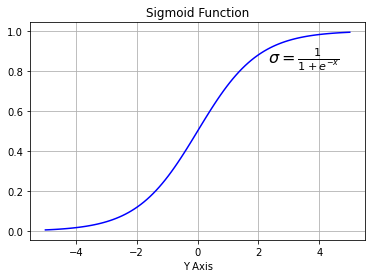

In [40]:
## Passons maintenant aux fonctions d'activation
## la fonction d'activation que nous aurons ici c'est tout d'abord la fonction sigmoid ou logistique
## Dans cette fonction les valeur ne sont que de 0 a 1 avec 0 et 1 exclu <0.5 alors 0, >=0.5 alors 1 
def sigma(x):
    return 1/(1+np.exp(-x))

X = np.linspace(-5,5,100)

plt.plot(X,sigma(X),'b')
plt.xlabel('X Axis')
plt.xlabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3,0.84,r'$\sigma=\frac{1}{1+e^{-x}}$',fontsize=16) ## ecrire une formule mathematique
plt.show()

In [41]:
## on peut import la fonction sigmoit de spacy que de nous meme le coder
from scipy.special import expit
print(expit(3.4))
print(expit([3,4,1]))
print(expit(np.array([0.8,2.3,8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


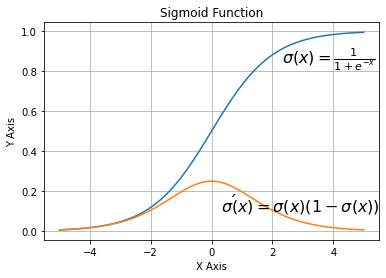

In [42]:
## la fonction sigmoid est utilise dans les reseaux de neuronnes pour introduire la non linearite
## et cette fonction est vraiment bonne a utiliser car sa derivee est assez simple sima'(x)=sigma(x)*(1-sigma(x))

def sigma(x):
    return 1/(1+np.exp(-x))

X = np.linspace(-5,5,100)

plt.plot(X,sigma(X))
plt.plot(X,sigma(X)*(1-sigma(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')

plt.grid()
plt.text(2.3,0.84,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=16)
plt.text(0.3,0.1,r'$\sigma\'(x)=\sigma(x)(1-\sigma(x))$',fontsize=16)
plt.show()

In [43]:
@np.vectorize
def sigmoid(x):
    return 1/(1+np.e** -x)

sigmoid([3,4,5])

array([0.95257413, 0.98201379, 0.99330715])

In [44]:
## il existe une toute autre fonction aussi interressante, c'est la fonction RELU
## cette fonction est positive et est definie: y=max(0,x)

def ReLU(x):
    return np.maximum(0.0,x)
## fonction derivee de RELU

def RELU_derivation(x):
    if x<=0:
        return 0
    else:
        return 1

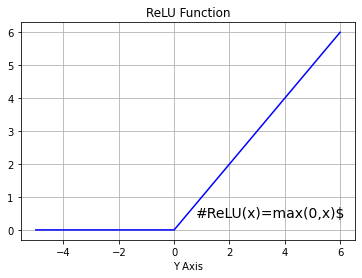

In [45]:
X = np.linspace(-5,6,100)
plt.plot(X,ReLU(X),'b')
plt.xlabel('X Axis')
plt.xlabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8,0.4,r'#ReLU(x)=max(0,x)$',fontsize=14)
plt.show()

In [46]:
## nous allons maintenant implementer la fonction de prediction run afin de mettre ensemble tout ce qu<il faut pour un reseau de neuronne

from scipy.special import expit as activation_function  #importation de la fonction sigmoid
from scipy.stats import truncnorm  ## ici on importe de scipy l'outil truncnorm pour avoir,
                                  ## des donnees bornees et suivant une loi normale


def truncated_normal(mean=0,sd=1,low=0,upp=10):
    return truncnorm((low-mean)/sd,(upp-mean)/sd,loc=mean,scale=sd)

class NeuralNetwork:
    
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        ## cette methode initialise tous les poids de notre reseau de neuronne
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                        self.no_of_in_nodes))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    def run(self,input_vector):
        input_vector =np.array(input_vector,ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector) # @ c'est pour appliquer des valeurs a une variable qui en a besoi pour fonctionner
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        
        return output_vector

In [47]:
## ici on fait une instanciation de notre classe

simple_network = NeuralNetwork(no_of_in_nodes=2,
                              no_of_out_nodes=2,
                              no_of_hidden_nodes=2,
                              learning_rate=0.6)

In [48]:
## avec ceeci nous pouvons lancer notre resau de neurone afin de voir les valeurs des noeuds de sorties
simple_network.run([(3,4)])

array([[0.49639322],
       [0.58369487]])

In [49]:
def truncated_normal(mean=0,sd=1,low=0,upp=10):
    return truncnorm((low-mean)/sd,(upp-mean)/sd,loc=mean,scale=sd)

class NeuralNetwork1:
    
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        ## cette methode initialise tous les poids de notre reseau de neuronne
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                        self.no_of_in_nodes))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    def train(self,input_vector,target_vector):
        input_vector =np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,1) ## reshape(input_reshape.size,1) permet d'avoir chaque tuple ou liste ligne par ligne et non comme une meme ligne
        target_vector = np.array(target_vector).reshape(target_vector.size,1)## comme pour input n'oubliant pas que 1 c'est pour le nombre de colonne
        
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error*output_vector_network*(1.0-output_vector_network) #on calcule le gradient de l'erreur
        
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        
        # on calcule les erreurs des couches cachees
        hidden_errors = self.weights_hidden_out.T @ output_error
        # mise a jour des poids
        tmp = hidden_errors * output_vector_hidden *(1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate *(tmp @ input_vector.T)
        
    def run(self, input_vector):
        ## le vecteur d'entre doit etre un vecteur colonne
        
        input_vector = np.array(input_vector)
        input_vector  = input_vector.reshape(input_vector.size,1)
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        
        return output_vector_network
    
    def evaluate(self, data, labels):
        ## cette methode nous permet de ragarder la correspondance des bons resultats,
        ## sur les resultats predit.
        ## le resultat est predit correct si l'index de la valeur maximale correspond a l'index avec 1 en one-hot encoding
        ## exple: res=[0.1,0.6],label[i] = [0,1] la c'est bon
        corrects,wrongs=0,0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects +=1
            else:
                wrongs += 1
        return corrects,wrongs

In [50]:
x=np.array(((6,5,3,4),(6,9,10),(6,9,10),(6,9,10)))
x=x
print(x)

[(6, 5, 3, 4) (6, 9, 10) (6, 9, 10) (6, 9, 10)]


In [51]:
from sklearn.datasets import make_blobs

n_samples = 500
blob_centers = ([2,6],[6,2],[7,7])
n_classes = len(blob_centers)
data,labels=make_blobs(n_samples=n_samples,centers=blob_centers,random_state=7)

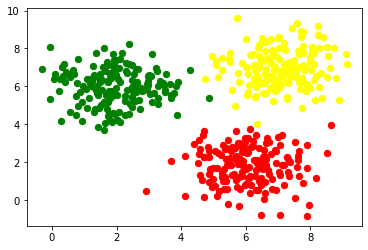

In [52]:
colours = ('green','red','yellow')
fig,ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:,0],
              data[labels==n_class][:,1],
              c = colours[n_class],
              s=40,
              label=str(n_class))

In [53]:
## les donnees que nous avons sont mal representees, nous avons besoin du one hot encoding
labels = np.arange(n_classes) == labels.reshape(labels.size,1)
labels = labels.astype(np.float)
labels[:7]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [54]:
#creons mainteant les donnees de test et d'entrainement

res = train_test_split(data,labels,
                      train_size=0.8,
                      test_size=0.2,
                      random_state=42)

train_data,test_data,train_labels,test_labels=res

In [55]:
## on cree une entree avec 2 noeuds d'entrees et trois noeuds de sorties(un noeud pour chaque classe)

simple_network = NeuralNetwork1(no_of_in_nodes=2,
                              no_of_out_nodes=3,
                              no_of_hidden_nodes=5,
                              learning_rate=0.3)

In [56]:
for i in range(len(train_data)):
    simple_network.train(train_data[i],train_labels[i])

simple_network.evaluate(train_data,train_labels)

(391, 9)

In [57]:
## on peut dire que notre modele fait de bonne previsions
class NeuralNetwork2:
    
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,
                learning_rate,bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        ## cette methode initialise tous les poids de notre reseau de neuronne avc bias
        bias_node =1 if self.bias else 0
        rad = 1/np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                        self.no_of_in_nodes + bias_node))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
    
    def train(self,input_vector,target_vector):
        input_vector =np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,1) ## reshape(input_reshape.size,1) permet d'avoir chaque tuple ou liste ligne par ligne et non comme une meme ligne
        if self.bias:
            ## ajout  du noeud bias en dernier position dans le vecteur d'entree
            input_vector = np.concatenate((input_vector,[[self.bias]]))
        target_vector = np.array(target_vector).reshape(target_vector.size,1)## comme pour input n'oubliant pas que 1 c'est pour le nombre de colonne
        
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        
        if self.bias:
            output_vector_hidden = np.concatenate((output_vector_hidden,[[self.bias]]))
            
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        
        tmp = output_error*output_vector_network*(1.0-output_vector_network) #on calcule le gradient de l'erreur
        
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        
        # on calcule les erreurs des couches cachees
        hidden_errors = self.weights_hidden_out.T @ output_error
        # mise a jour des poids
        tmp = hidden_errors * output_vector_hidden *(1.0 - output_vector_hidden)
        
        if self.bias:
            x=(tmp @input_vector.T)[:-1,:] ## suppresion de la derniere ligne
        else:
            x=tmp @ input_vector.T 
        self.weights_in_hidden +=self.learning_rate * x
        
    def run(self, input_vector):
        ## le vecteur d'entre doit etre un vecteur colonne
        
        input_vector = np.array(input_vector)
        input_vector  = input_vector.reshape(input_vector.size,1)
        if self.bias:
            ## ajout du noeud a la fin du vecteur de sortie
            input_vector=np.concatenate((input_vector,[[1]]))
        input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate((input4hidden ,[[1]]))
            
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        
        return output_vector_network
    
    def evaluate(self, data, labels):
        ## cette methode nous permet de ragarder la correspondance des bons resultats,
        ## sur les resultats predit.
        ## le resultat est predit correct si l'index de la valeur maximale correspond a l'index avec 1 en one-hot encoding
        ## exple: res=[0.1,0.6],label[i] = [0,1] la c'est bon
        corrects,wrongs=0,0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects +=1
            else:
                wrongs += 1
        return corrects,wrongs

In [58]:
simple_network = NeuralNetwork2(no_of_in_nodes=2,
                               no_of_out_nodes=3,
                               no_of_hidden_nodes=5,
                               learning_rate=0.1,
                               bias=1)

for i in range(len(train_data)):
    simple_network.train(train_data[i],train_labels[i])

simple_network.evaluate(train_data,train_labels)

(390, 10)

In [59]:
## Exercice
## Dans cette exercice,
## Il est question de creer un reseau de neuronne qui classifi le dataset des fleurs vu au chapitre 3

c =np.loadtxt("data/strange_flowers.txt",delimiter=" ")

data = c[:,:-1]
n_classes = data.shape[1]
labels = c[:,-1]
data[:5]

array([[252.  ,  94.  ,  11.  ,   3.8 ],
       [252.  , 115.  ,   1.  ,   3.44],
       [248.  , 115.  ,   7.  ,   3.6 ],
       [248.  ,  94.  ,   7.  ,   3.73],
       [250.  , 112.  ,  14.  ,   4.13]])

In [60]:
labels = np.arange(n_classes) == labels.reshape(labels.size,1)
labels = labels.astype(np.float)
labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [61]:
## metton nos donnees sur une echelle sinon on aura des resultat tres instable lors du processus d'apprentissage

from sklearn import preprocessing

data = preprocessing.scale(data)
data[:5]
data.shape
labels.shape

(795, 4)

In [62]:
## on divise notre jeu de donees en ensemble d'entrainement et de test
res= train_test_split(data,labels,
                     train_size=0.8,
                     test_size=0.2,
                     random_state=42)
train_data,test_data,train_labels,test_labels=res
train_labels[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [63]:
## maintenat entrainons nos donnees dans notre reseau de neuronnes et voyons la liste des bien predit ou non
simple_network = NeuralNetwork2(no_of_in_nodes=4,
                              no_of_out_nodes=4,
                              no_of_hidden_nodes=20,
                              learning_rate=0.3)

for i in range(len(train_data)):
    simple_network.train(train_data[i],train_labels[i])

simple_network.evaluate(train_data,train_labels)

(488, 148)

In [64]:
## SOFTMAX COMME FONCTION D'ACTIVATION(qui nous permet de mapper les resultats de la couche de sortie, 
## non normalisee, a une distribution de probabilite sur les classes predites en sorties )

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

x= np.array([1,0,3,5])
y=softmax(x)

y , x / x.sum()

(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [65]:
## suppression l'instabilite des nombre en virgule flottant
def softmax(x):
    e_x=np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmax(x)

array([0.01578405, 0.00580663, 0.11662925, 0.86178007])

In [66]:
s = softmax(np.array([0,4,5]))

si_sj= -s*s.reshape(3,1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der

[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [67]:
def truncated_normal(mean=0,sd=1,low=0,upp=10):
    return truncnorm((low-mean)/sd,(upp-mean)/sd,loc=mean,scale=sd)

class NeuralNetwork_Softmax:
    
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,
                learning_rate, softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.softmax = softmax
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        ## cette methode initialise tous les poids de notre reseau de neuronne
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                        self.no_of_in_nodes))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0,sd=1,low=-rad,upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))
    
    def train(self,input_vector,target_vector):
        input_vector =np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,1) ## reshape(input_reshape.size,1) permet d'avoir chaque tuple ou liste ligne par ligne et non comme une meme ligne
        target_vector = np.array(target_vector).reshape(target_vector.size,1)## comme pour input n'oubliant pas que 1 c'est pour le nombre de colonne
        
        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)

        output_error = target_vector - output_vector_network
        
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = -ovn*ovn.reshape(self.no_of_out_nodes,1)
            s_der= np.diag(ovn) + si_sj
            tmp = s_der @ output_error
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        else:
            tmp = output_error*output_vector_network*(1.0-output_vector_network) #on calcule le gradient de l'erreur
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        
        # on calcule les erreurs des couches cachees
        hidden_errors = self.weights_hidden_out.T @ output_error
        # mise a jour des poids
        tmp = hidden_errors * output_vector_hidden *(1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate *(tmp @ input_vector.T)
        
    def run(self, input_vector):
        ## le vecteur d'entre doit etre un vecteur colonne
        
        input_vector = np.array(input_vector)
        input_vector  = input_vector.reshape(input_vector.size,1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)
        
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden) 
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)
        
        return output_vector_network
    
    def evaluate(self, data, labels):
        ## cette methode nous permet de ragarder la correspondance des bons resultats,
        ## sur les resultats predit.
        ## le resultat est predit correct si l'index de la valeur maximale correspond a l'index avec 1 en one-hot encoding
        ## exple: res=[0.1,0.6],label[i] = [0,1] la c'est bon
        corrects,wrongs=0,0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects +=1
            else:
                wrongs += 1
        return corrects,wrongs

In [68]:
from sklearn.datasets import make_blobs

n_samples = 300
samples,labels = make_blobs(n_samples=n_samples,centers=([2,6],[6,2]),random_state=0)

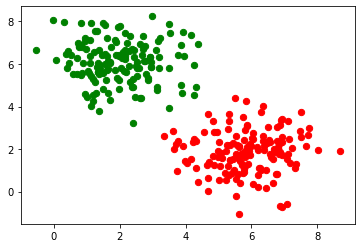

In [69]:
colours = ('green','red','blue','magenta','yellow','cyan')
fig,ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels == n_class][:,0],samples[labels==n_class][:,1],
              c=colours[n_class],s=40,label=str(n_class))
    
size_of_learn_sample = int(n_samples *0.8)
learn_data = samples[:size_of_learn_sample]
test_data = samples[-size_of_learn_sample:]

In [70]:
## instancions notre softmax classe
simple_network = NeuralNetwork_Softmax(no_of_in_nodes=2,
                                      no_of_out_nodes=2,
                                      no_of_hidden_nodes=5,
                                      learning_rate=0.3,
                                      softmax=True)

In [71]:
for x in [(1,4),(2,6),(3,3),(6,2)]:
    y = simple_network.run(x)
    print(x,y,s.sum())

(1, 4) [[0.55690784]
 [0.44309216]] 1.0
(2, 6) [[0.55845146]
 [0.44154854]] 1.0
(3, 3) [[0.56966576]
 [0.43033424]] 1.0
(6, 2) [[0.58170804]
 [0.41829196]] 1.0


In [72]:
labels_one_hot = (np.arange(2) == labels.reshape(labels.size,1))
labels_one_hot = labels_one_hot.astype(np.float)

for i in range(size_of_learn_sample):
    simple_network.train(learn_data[i],labels_one_hot[i])

from collections import Counter
evaluation =Counter()
simple_network.evaluate(learn_data,labels)

(123, 117)

In [73]:
### MATRICE DE CONFUSION(ligne pour les classes predites et les colonnes pour classes actuelle)

cm = np.array([[5825,1,49,23,7,46,30,12,21,26],
         [1,6654,48,25,10,32,19,62,111,10],
         [2,20,5561,69,13,10,2,45,18,2],
         [6,26,99,5786,5,111,1,41,110,79],
         [4,10,43,6,5533,32,11,53,34,79],
         [3,1,2,56,0,4954,23,0,12,5],
         [31,4,42,22,45,103,5806,3,34,3],
         [0,4,30,29,5,6,0,5817,2,28],
         [35,6,63,58,8,59,26,13,5394,24],
         [16,16,21,57,216,68,0,219,115,5693]])

In [74]:
## fonction de precision, rappel,precision F1, et rappel F1
def precision(label,confusion_matrix):
    col = confusion_matrix[:,label]
    return confusion_matrix[label,label] / col.sum()

def recall(label,confusion_matrix):
    row = confusion_matrix[label,:]
    return confusion_matrix[label,label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows,columns = confusion_matrix.shape
    sum_of_precisions =0
    for label in range(rows):
        sum_of_precisions += precision(label,confusion_matrix)
    return sum_of_precisions/rows

def recall_macro_average(confusion_matrix):
    rows,columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label,confusion_matrix)
    return sum_of_recalls / columns

In [75]:
print('label precision recall')
for label in range(10):
    print(f"{label:5d}{precision(label,cm):9.3f}{recall(label,cm):6.3f}")

label precision recall
    0    0.983 0.964
    1    0.987 0.954
    2    0.933 0.968
    3    0.944 0.924
    4    0.947 0.953
    5    0.914 0.980
    6    0.981 0.953
    7    0.928 0.982
    8    0.922 0.949
    9    0.957 0.887


In [76]:
print('precision total:',precision_macro_average(cm))
print('recall total:',recall_macro_average(cm))

precision total: 0.9496885564052286
recall total: 0.9514531547877969


In [77]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()

    return diagonal_sum/ sum_of_all_elements

In [78]:
accuracy(cm)

0.9503833333333334

In [79]:
## lancement des donnees environ 1 min
image_size = 28
no_of_different_labels = 10
image_pixels = image_size*image_size
data_path = "data/mnist/" ## ici remplacer par 

train_data = np.loadtxt(data_path+"mnist_train.csv",delimiter=',')
test_data = np.loadtxt(data_path+"mnist_test.csv",delimiter=',')

test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [80]:
test_data[test_data==255]
test_data.shape

(10000, 785)

In [81]:
## ici nous voulons mettre sur une meme echelle les nombre allant de 0 a 255 incluant les valeurs des bornes pour cela,
## on vas multiplier chaque nombre par 0.99/255 +0.01 au resultat pour eviter d'avoir une valeur d'entrees du reseau de valeur 0 
## np.arange : l'extremite droite n'est pas prise en compte
fac = 0.99/255
train_imgs = np.asfarray(train_data[:,1:]) * fac +0.01 ## asfarray converti une liste en liste de type flottant
test_imgs = np.asfarray(test_data[:,1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:,:1])
test_labels = np.asfarray(test_data[:,:1])

In [82]:
## mettons nos different chiffre sous forme de one hot encoding

label_representaion =np.arange(10) # arange pour selectionner les chiffres entre(0 et 10 exclu)

for label in range(10):
    one_hot= (label_representaion == label).astype(np.int)## on convertit les booleens genere en entier
    print("label: ",label,' in one-hot representation', one_hot)

label:  0  in one-hot representation [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation [0 0 0 0 0 0 0 0 0 1]


In [83]:
## maintenant nous sommes prets a mettre nos donnees en one hot encoding pour nos labels.
## mais a la place des 0 et des 1 on aura 0.01 et 0.99 qui est mieux pour les calculs.
label_representation = np.arange(no_of_different_labels)

## transformation des labels en one hot representation

train_labels_one_hot = (label_representation == train_labels).astype(np.float)
test_labels_one_hot = (label_representation == test_labels).astype(np.float)

## vu qu'on ne veut pas des 0 ni des 1 dans les labels ainsi que dans le jeux de donnees a utiliser,
## nous optons pour mettre des 0.99 si nous avons un 1 et 0.01 sinon

train_labels_one_hot[train_labels_one_hot==0]=0.01
train_labels_one_hot[train_labels_one_hot==1]=0.99

test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==0]=0.99


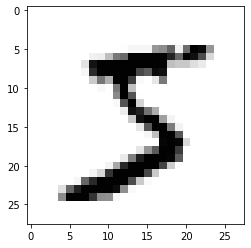

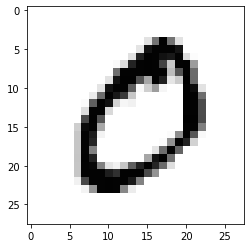

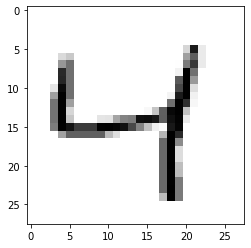

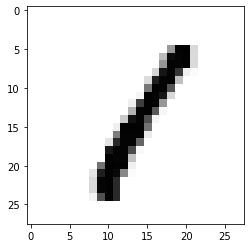

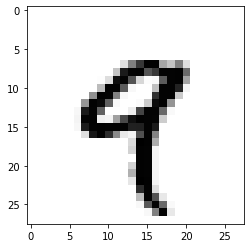

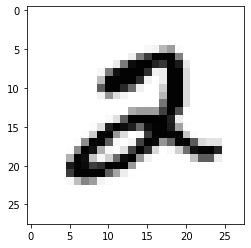

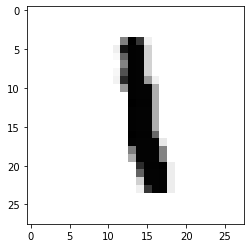

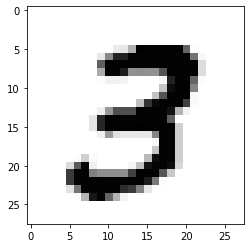

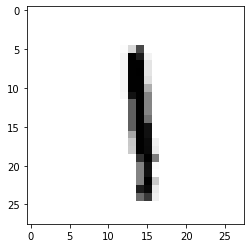

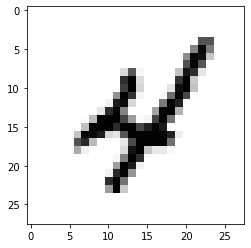

In [84]:
## Avant d'utiliser nos donnees dans un reseau de Neuronnes(celles de MNIST), regardons quelque images:

for i in range(10):
    img = train_imgs[i].reshape((28,28)) ## on utilise notre jeux d'entrainnement qu'on a importe au depart
    plt.imshow(img,cmap="Greys") ## nous permet d'afficher une image sous la forme d'un grayscale
    plt.show()

In [85]:
## compte tenu du chargement lent des donnes en csv nous allons transformer ces fichiers en binaire avec une fonction dump du module pickle
## ici on ecrit dans un fichier .pkl les donnees environ 3-10s
import pickle

with open("data/mnist/pickled_mnist.pkl","bw") as fh:
    data = (train_imgs,
           test_imgs,
           train_labels,
           test_labels,
           train_labels_one_hot,
           test_labels_one_hot)
    
    pickle.dump(data,fh)

In [86]:
## nous pouvons maintenant observer ces donnees et voir que le lancement est beaucoup plus rapide
## ici on lit le fichier .pkl avec br
## moins de 5s
with open("data/mnist/pickled_mnist.pkl","br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot =data[4]
test_labels_one_hot =data[5]

image_size = 28 # pour avoir les images 28*28
no_of_different_labels = 10 ## nombre des differents labels
image_pixels = image_size*image_size

In [87]:
## maintenant classifion nos donnees obtenue ci haut
## ici sachant que vectorize prend en entree une sequence d'objet et retourne en sortie un tableau numpy ou une liste numpy
## on applique vectorize a la fonction sigmoid pour qu'elle en genere un array ou liste numpy

@np.vectorize 
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

activation_function = sigmoid

class NeuralNetwork_for_digit:
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,
                            sd=1,
                            low=-rad,
                            upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X =truncated_normal(mean = 0,sd=1,low=-rad,upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                         self.no_of_hidden_nodes))
    
    def train(self,input_vector,target_vector):
        input_vector = np.array(input_vector,ndmin=2).T
        target_vector =np.array(target_vector,ndmin=2).T
        
        output_vector1 = np.dot(self.wih,input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who,output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector -output_network
        
        tmp = output_errors *output_network\
                    * (1.0 -output_network)
        tmp = self.learning_rate *np.dot(tmp,output_hidden.T)
        
        self.who += tmp
        hidden_errors = np.dot(self.who.T,
                              output_errors)
        
        tmp = hidden_errors *output_hidden * \
                (1.0 - output_hidden)
        
        self.wih += self.learning_rate \
                            *np.dot(tmp,input_vector.T)
        
    def run(self,input_vector):
        input_vector = np.array(input_vector,ndmin = 2).T
        output_vector = np.dot(self.wih,input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who,output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector

    def confusion_matrix(self, data_array,labels):
        cm = np.zeros((10,10), int)
        
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max,int(target)] += 1
        return cm
    
    def precision(self,label,confusion_matrix):
        col = confusion_matrix[:,label]
        return confusion_matrix[label,label]/col.sum()
    
    def recall(self,label,confusion_matrix):
        row = confusion_matrix[label,:] 
        return confusion_matrix[label,label]/row.sum()
    
    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs

In [88]:
ANN =  NeuralNetwork_for_digit(no_of_in_nodes = image_pixels,
                              no_of_out_nodes=10,
                              no_of_hidden_nodes=100,
                              learning_rate=0.1)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i],train_labels_one_hot[i])

In [89]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

[7.] 7 0.9955502666157507
[2.] 2 0.8343481680290071
[1.] 1 0.9860756340479724
[0.] 0 0.9888975372285408
[4.] 4 0.9222605261097265
[1.] 1 0.975724669097442
[4.] 4 0.961116283187103
[9.] 9 0.9896002777864479
[5.] 6 0.6124356753146696
[9.] 9 0.923843463558095
[0.] 0 0.9588042509458504
[6.] 6 0.4414934100554422
[9.] 9 0.9813776223090649
[0.] 0 0.9769073614500566
[1.] 1 0.9889469258172445
[5.] 5 0.9586328070610615
[9.] 9 0.9774288975813583
[7.] 7 0.9909080339143029
[3.] 3 0.7496975376613692
[4.] 4 0.9913988904706094


In [90]:
corrects,wrongs = ANN.evaluate(train_imgs,train_labels)
print("accuracy train: ",corrects/(corrects+wrongs))
corrects,wrongs = ANN.evaluate(test_imgs,test_labels)
print("accuracy:test",corrects /(corrects + wrongs))

cm = ANN.confusion_matrix(train_imgs,train_labels)

print(cm)

for i in range(10):
    print("digit: ",i,'precision: ',ANN.precision(i,cm),
         'recall:', ANN.recall(i,cm))

accuracy train:  0.9450666666666667
accuracy:test 0.943
[[5786    1   35   10   16   28   32    8   15   27]
 [   1 6629   81   25   13   26   16   75  103   16]
 [   8   16 5476   53   14    9    6   55   12    9]
 [   7   29   97 5779    1   78    3   15  114   71]
 [  16   16   61    6 5440   37   16   51   44   89]
 [  12    7   10   82    1 5053   39    1   26   10]
 [  35    7   42   16   57   65 5777    8   35    2]
 [   3    7   50   33    6    6    0 5734    2   38]
 [  41   17   85   63    6   50   28   10 5359   16]
 [  14   13   21   64  288   69    1  308  141 5671]]
digit:  0 precision:  0.9768698294783049 recall: 0.9711312520980194
digit:  1 precision:  0.9832393948383269 recall: 0.9490336435218325
digit:  2 precision:  0.9191003692514267 recall: 0.9678331565924355
digit:  3 precision:  0.9425868536943403 recall: 0.9329996771068776
digit:  4 precision:  0.9311879493324204 recall: 0.9418282548476454
digit:  5 precision:  0.9321158457849106 recall: 0.9641289830185079
digit

In [91]:
## on peut effectuer plusieurs fois l'entrainement chaque tour d'entrainement est appele epoch

epochs = 3
NN = NeuralNetwork_for_digit(no_of_in_nodes=image_pixels,
                 no_of_out_nodes=10,
                 no_of_hidden_nodes=100,
                 learning_rate=0.10)

for epoch in range(epochs):
    print("epochs: ",epoch)
    
    for i in range(len(train_imgs)):
        NN.train(train_imgs[i],
                train_labels_one_hot[i])
    
    corrects,wrongs = NN.evaluate(train_imgs,train_labels)
    print("accuracy train: ",corrects/(corrects+ wrongs))
    corrects,wrongs = NN.evaluate(test_imgs,test_labels)
    print("accuracy test: ",corrects/(corrects+ wrongs))

epochs:  0
accuracy train:  0.9511333333333334
accuracy test:  0.9497
epochs:  1
accuracy train:  0.9648333333333333
accuracy test:  0.9596
epochs:  2
accuracy train:  0.9689166666666666
accuracy test:  0.9617


In [92]:
## on peut faire un entrainnement multiple de notre reseau de neurones
## mais pour cela on doit modifier notre classe neural network en ajoutant,
## une methode faisant l'entrainement une fois et une methode faisant l'entrainement

class NeuralNetwork_for_digit_1:
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate=learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        
        rad = 1/np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0,
                            sd=1,
                            low=-rad,
                            upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1/np.sqrt(self.no_of_hidden_nodes)
        X =truncated_normal(mean = 0,sd=1,low=-rad,upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                         self.no_of_hidden_nodes))
    
    def train_single(self,input_vector,target_vector):
        output_vectors = []
        input_vector = np.array(input_vector,ndmin=2).T
        target_vector =np.array(target_vector,ndmin=2).T
        
        output_vector1 = np.dot(self.wih,input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who,output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector -output_network
        
        tmp = output_errors *output_network *\
                    (1.0 -output_network)
        tmp = self.learning_rate *np.dot(tmp,output_hidden.T)
        
        self.who += tmp
        hidden_errors = np.dot(self.who.T,
                              output_errors)
        
        tmp = hidden_errors *output_hidden * (1.0 - output_hidden)
        
        self.wih += self.learning_rate *np.dot(tmp,input_vector.T)
    
    def train(self,data_array,labels_one_hot_array,epochs=1,intermediate_results =False):
        intermediate_weights=[]
        
        for epoch in range(epochs):
            print("*",end="")
            for i in range(len(data_array)):
                self.train_single(data_array[i],
                                 labels_one_hot_array[i])
                
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(),
                                                self.who.copy()))

        return intermediate_weights
    
    def confusion_matrix(self, data_array,labels):
        cm = {}
        
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            
            if (target,res_max) in cm:
                cm[(target,res_max)] += 1
            else:
                cm[(target,res_max)] = 1
        return cm
    
    def run(self,input_vector):
        input_vector = np.array(input_vector,ndmin = 2).T
        output_vector = np.dot(self.wih,input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who,output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector

    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs


In [93]:
## les etoiles nos donnes de savoir a quelle nombre d'epochs on est
epochs=10
ANN =  NeuralNetwork_for_digit_1(no_of_in_nodes = image_pixels,
                              no_of_out_nodes=10,
                              no_of_hidden_nodes=100,
                              learning_rate=0.15)

weights = ANN.train(train_imgs,
                    train_labels_one_hot,
                    epochs = epochs,
                    intermediate_results = True)

**********

In [94]:
## voyons maintenant le resultat de notre lancement

cm = ANN.confusion_matrix(train_imgs,train_labels)

print(ANN.run(train_imgs[i]))


[[4.73737143e-03]
 [9.99392980e-04]
 [2.75339412e-04]
 [8.08789580e-03]
 [3.44909549e-04]
 [4.39278381e-03]
 [1.12914177e-03]
 [1.44618663e-03]
 [9.88151625e-01]
 [1.16296619e-02]]


In [95]:
## on stocke notre matrice de confusion sous forme de liste
cm =list(cm.items())
print(sorted(cm))

[((0.0, 0), 5847), ((0.0, 1), 1), ((0.0, 2), 1), ((0.0, 4), 7), ((0.0, 5), 2), ((0.0, 6), 19), ((0.0, 7), 3), ((0.0, 8), 34), ((0.0, 9), 9), ((1.0, 0), 2), ((1.0, 1), 6684), ((1.0, 2), 9), ((1.0, 3), 6), ((1.0, 4), 9), ((1.0, 6), 2), ((1.0, 7), 5), ((1.0, 8), 18), ((1.0, 9), 7), ((2.0, 0), 32), ((2.0, 1), 19), ((2.0, 2), 5760), ((2.0, 3), 23), ((2.0, 4), 6), ((2.0, 5), 4), ((2.0, 6), 13), ((2.0, 7), 21), ((2.0, 8), 64), ((2.0, 9), 16), ((3.0, 0), 10), ((3.0, 1), 10), ((3.0, 2), 44), ((3.0, 3), 5843), ((3.0, 4), 7), ((3.0, 5), 48), ((3.0, 6), 5), ((3.0, 7), 31), ((3.0, 8), 57), ((3.0, 9), 76), ((4.0, 0), 5), ((4.0, 1), 6), ((4.0, 2), 6), ((4.0, 3), 1), ((4.0, 4), 5695), ((4.0, 5), 2), ((4.0, 6), 30), ((4.0, 7), 5), ((4.0, 8), 11), ((4.0, 9), 81), ((5.0, 0), 24), ((5.0, 1), 7), ((5.0, 2), 8), ((5.0, 3), 35), ((5.0, 4), 4), ((5.0, 5), 5236), ((5.0, 6), 23), ((5.0, 7), 6), ((5.0, 8), 39), ((5.0, 9), 39), ((6.0, 0), 37), ((6.0, 1), 17), ((6.0, 2), 1), ((6.0, 4), 7), ((6.0, 5), 14), ((6.0, 6

In [97]:
## affichons le taux de succes par epoch

for i in range(epochs):
    print("epoch: ",i)
    ANN.wih = weights[i][0]
    ANN.who = weights[i][1]
    
    corrects,wrongs =ANN.evaluate(train_imgs,train_labels)
    print("accuracy train: ",corrects/(corrects + wrongs))
    
    corrects,wrongs =ANN.evaluate(test_imgs,test_labels)
    print("accuracy train: ",corrects/(corrects + wrongs))

epoch:  0
accuracy train:  0.9460833333333334
accuracy train:  0.9441
epoch:  1
accuracy train:  0.9571333333333333
accuracy train:  0.9529
epoch:  2
accuracy train:  0.9654666666666667
accuracy train:  0.9589
epoch:  3
accuracy train:  0.9691666666666666
accuracy train:  0.9587
epoch:  4
accuracy train:  0.9695833333333334
accuracy train:  0.9595
epoch:  5
accuracy train:  0.9708833333333333
accuracy train:  0.9615
epoch:  6
accuracy train:  0.9707666666666667
accuracy train:  0.9607
epoch:  7
accuracy train:  0.9732333333333333
accuracy train:  0.962
epoch:  8
accuracy train:  0.9748
accuracy train:  0.9619
epoch:  9
accuracy train:  0.9721333333333333
accuracy train:  0.9597


In [98]:
## Maintenant nous allons passer a la creation d'un modele pour classification d'images avec l'ajout du biais et visualiser les performance
## De classification de ce dernier

## simoid et truncated_normal etant defini on peut s'en passer

class NeuralNetwork_for_digit_1_with_Bias:
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate,
                bias =None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate=learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        
        bias_node = 1 if self.bias else 0
        
        rad = 1/np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0,
                            sd=1,
                            low=-rad,
                            upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes + bias_node)
        X =truncated_normal(mean = 0,sd=1,low=-rad,upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                         self.no_of_hidden_nodes + bias_node))
    
    def train(self,input_vector,target_vector):
        
        bias_node = 1 if self.bias else 0
        
        if self.bias:
            input_vector = np.concatenate((input_vector,[self.bias]))
            
        input_vector = np.array(input_vector,ndmin=2).T
        target_vector =np.array(target_vector,ndmin=2).T
        
        output_vector1 = np.dot(self.wih,input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden,[[self.bias]]))
            
        output_vector2 = np.dot(self.who,output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector -output_network
        
        tmp = output_errors *output_network *\
                    (1.0 -output_network)
        tmp = self.learning_rate *np.dot(tmp,output_hidden.T)
        
        self.who += tmp
        hidden_errors = np.dot(self.who.T,
                              output_errors)
        
        tmp = hidden_errors *output_hidden * (1.0 - output_hidden)
        
        if self.bias:
            x = np.dot(tmp,input_vector.T)[:-1,:]
        else:
            x = np.dot(tmp,input_vector.T)
            
        self.wih += self.learning_rate * x

    def run(self,input_vector):
        
        if self.bias: 
            input_vector = np.array((input_vector,[1]))
            
        input_vector = np.array(input_vector,ndmin = 2).T
        
        output_vector = np.dot(self.wih,input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate((output_vector,[[1]])) 
        
        output_vector = np.dot(self.who,output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector

    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs


In [99]:
## affichons les resultats de notre entrainement
ANN = NeuralNetwork_for_digit_1_with_Bias(no_of_in_nodes = image_pixels,
                                          no_of_out_nodes=10,
                                          no_of_hidden_nodes=200,
                                          learning_rate=0.15,
                                          bias =None)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i],train_labels_one_hot[i])

for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res),np.max(res))

[7.] 7 0.9934007335921876
[2.] 2 0.7772952818155401
[1.] 1 0.9957312629621594
[0.] 0 0.9760370576347588
[4.] 4 0.9474390710039267
[1.] 1 0.9901517907406526
[4.] 4 0.9963396207234237
[9.] 9 0.9848183274687948
[5.] 9 0.25364468109425875
[9.] 9 0.9914915596330609
[0.] 0 0.9858979477380565
[6.] 6 0.8978916724661061
[9.] 9 0.9942204478946454
[0.] 0 0.9885232964212659
[1.] 1 0.994236294844371
[5.] 5 0.9636365181392379
[9.] 9 0.9903558779953825
[7.] 7 0.994036400830501
[3.] 3 0.8295600171084746
[4.] 4 0.9982168031641026


In [100]:
## reagardons le taux de succes de notre reseau de neuronnes

corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects/(corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs,test_labels)
print("accuracy: test", corrects/(corrects + wrongs))

accuracy train:  0.95955
accuracy: test 0.9563


## Version  Biais Et Epoch

In [101]:
## le code qui suit est ameliore car les poids don cree dans la boucle a la place de code redondant

## simoid et truncated_normal etant defini on peut s'en passer

class NeuralNetwork_for_digit_Bias_And_Epoch:
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                no_of_hidden_nodes,
                learning_rate,
                bias =None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate=learning_rate
        self.bias = bias
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        
        bias_node = 1 if self.bias else 0
        
        rad = 1/np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0,
                            sd=1,
                            low=-rad,
                            upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
        
        rad = 1/np.sqrt(self.no_of_hidden_nodes + bias_node)
        X =truncated_normal(mean = 0,sd=1,low=-rad,upp=rad)
        self.who = X.rvs((self.no_of_out_nodes,
                         self.no_of_hidden_nodes + bias_node))
    
    def train_single(self,input_vector,target_vector):
        
        bias_node = 1 if self.bias else 0
        
        if self.bias:
            input_vector = np.concatenate((input_vector,[self.bias]))
            
        output_vectors = []
        input_vector = np.array(input_vector,ndmin=2).T
        target_vector =np.array(target_vector,ndmin=2).T
        
        output_vector1 = np.dot(self.wih,input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden,[[self.bias]]))
            
        output_vector2 = np.dot(self.who,output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector -output_network
        #  mise a jour des poids
        tmp = output_errors *output_network *(1.0 -output_network)
        tmp = self.learning_rate *np.dot(tmp,output_hidden.T)
        
        self.who += tmp
        hidden_errors = np.dot(self.who.T,
                              output_errors)
        
        tmp = hidden_errors *output_hidden * (1.0 - output_hidden)
        
        if self.bias:
            x = np.dot(tmp,input_vector.T)[:-1,:]
        else:
            x = np.dot(tmp,input_vector.T)
            
        self.wih += self.learning_rate * x

    def train(self, data_array,labels_one_hot_array,epochs=1,
            intermediate_results=False):
        
            intermediate_weights = []
            for epoch in range(epochs):
                for i in range(len(data_array)):
                    self.train_single(data_array[i],labels_one_hot_array[i])
                    
                if intermediate_results:
                    intermediate_weights.append((self.wih.copy(),
                                        self.who.copy()))
                    
            return intermediate_weights
    
    
    def run(self,input_vector):
        ## input_vector peut etrr un tuple, une liste ou un ndarray
        
        if self.bias:
            ## ajout du noeud de biais au vecteur d'entre
            
            input_vector = np.concatenate((input_vector,[self.bias]))
            
        input_vector = np.array(input_vector,ndmin = 2).T
        
        output_vector = np.dot(self.wih,input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate((output_vector,[[self.bias]])) 
        
        output_vector = np.dot(self.who,output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector

    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs



In [102]:
## Affichons maintenant par Epochs le taux de succes du jeux de test et d'entrainement

epochs = 12

network = NeuralNetwork_for_digit_Bias_And_Epoch(no_of_in_nodes=image_pixels,
                                                    no_of_out_nodes=10,
                                                    no_of_hidden_nodes=100,
                                                    learning_rate=0.1,
                                                    bias=None)

weights =network.train(train_imgs,
                      train_labels_one_hot,
                      epochs=epochs,
                      intermediate_results=True)

for epoch in range(epochs):
    print("epoch: ", epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]
    corrects, wrongs = network.evaluate(train_imgs,train_labels)
    print("accuracy train: ", corrects /(corrects + wrongs))
    corrects, wrongs = network.evaluate(test_imgs,test_labels)
    print("accuracy test: ", corrects/(corrects + wrongs))

epoch:  0
accuracy train:  0.949
accuracy test:  0.9484
epoch:  1
accuracy train:  0.96295
accuracy test:  0.9597
epoch:  2
accuracy train:  0.968
accuracy test:  0.9626
epoch:  3
accuracy train:  0.9724166666666667
accuracy test:  0.964
epoch:  4
accuracy train:  0.9753333333333334
accuracy test:  0.9663
epoch:  5
accuracy train:  0.9751666666666666
accuracy test:  0.9643
epoch:  6
accuracy train:  0.9777333333333333
accuracy test:  0.9636
epoch:  7
accuracy train:  0.9768833333333333
accuracy test:  0.9653
epoch:  8
accuracy train:  0.9793166666666666
accuracy test:  0.9673
epoch:  9
accuracy train:  0.9789666666666667
accuracy test:  0.9634
epoch:  10
accuracy train:  0.978
accuracy test:  0.9636
epoch:  11
accuracy train:  0.9792166666666666
accuracy test:  0.9626


In [ ]:
## maintenant ce que nous voulons faire est de stocker le resultat final de notre modele ci-dessus
## dans un fichier .csv

epochs = 12

with open("nist_test.csv",'w') as fh_out:
    for hidden_nodes in [20, 50, 100, 120, 150]:
        for learning_rate in [0.01, 0.05, 0.1, 0.2]:
            for bias in [None, 0.5]:
                network = NeuralNetwork_for_digit_Bias_And_Epoch(no_of_in_nodes=image_pixels,
                                    no_of_out_nodes=10,
                                    no_of_hidden_nodes=hidden_nodes,
                                    learning_rate=learning_rate,
                                    bias=bias)
                weights = network.train(train_imgs,train_labels_one_hot,
                                        epochs=epochs,intermediate_results=True)
                
                for epoch in range(epochs):
                    print("*", end="")
                    network.wih = weights[epoch][0]
                    network.who = weights[epoch][1]
                    train_corrects, train_wrongs = network.evaluate(train_imgs,train_labels)
                    test_corrects, test_wrongs = network.evaluate(test_imgs,test_labels)
                    outstr = str(hidden_nodes)+ " " +str(learning_rate) + " " + str(bias)
                    outstr += " " + str(epoch) + " "
                    outstr += str(train_corrects / (train_corrects+train_wrongs)) + " "
                    outstr += str(train_wrongs / (train_corrects+train_wrongs)) + " "
                    outstr += str(test_corrects / (test_corrects+test_wrongs)) + " "
                    outstr += str(test_wrongs / (test_corrects +test_wrongs))
                    
                    fh_out.write(outstr + "\n" )
                    fh_out.flush()

## a la fin de l'execution de ce programme nous avons notre fichier nist_test.csv,
## contenant toute les donnes propre notre modele apres entrainement et test

***********************************************************************************************************************************************************************************************************************************************************************

In [ ]:
## Reseau de Neuronnes avec plusieurs couches cachees
## ici on vas creer un reseu de neuronne ameliore avec les matrices de poids construit dans la boucle au lieu des constructions redondantes

class NeuralNetwork_for_digit_1_with_multiple_runs:
    def __init__(self,
                network_structure,## ici nous avons la structure du reseau de neurone 
                                  ## compose de [input_nodes,hidden1_nodes,..,output_nodes]
                learning_rate,
                bias=None):
        
        self.structure = network_structure
        self.bias = bias
        self.learning_rate=learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index =1
        no_of_layers =len(self.structure)
        
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index -1]
            nodes_out =self.structure[layer_index]
            n =(nodes_in + bias_node)*nodes_out
            rad = 1/np.sqrt(nodes_in)
            
        X = truncated_normal(mean=2,
                            sd=1,
                            low=-rad,
                            upp=rad)
        wm = X.rvs(n).reshape((nodes_out,nodes_in + bias_node))
        self.wheights_matrices.append(wm)
        layer_index += 1
    
    def train(self,input_vector,target_vector):
        no_of_layers = len(self.structure)
        input_vector = np.array(input_vector,ndmin=2).T
        layer_index= 0
        
        ## les vecteurs d'entrees/sorties de nos differentes couches
        res_vectors = [input_vector]
        while layer_index < no_of_layers -1 :
            in_vector = res_vectors[-1]
            
            if self.bias:
                ## ajouter le noeud biais a la fin du vecteur des entrees
                
                in_vector = np.concatenate((in_vector,[[self.bias]]))
                res_vectors[-1] = in_vector
            
            x = np.dot(self.weights_matrices[layer_index],in_vector)
            out_vector = activation_function(x)
            ## le sortie d'une couche est l'entree de la suivante
            
            res_vectors.append(out_vector)
            layer_index +=1
            
        layer_index =no_of_layers -1
        
        target_vector = np.array(target_vector,ndmin=2).T
        
        # entrees de nos differentes couches
        
        output_errors = target_vector -out_vector
        
        while layer_index >0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]
            
            if self.bias and not layer_index == (no_of_layers -1):
                out_vector = out_vector[:-1,:].copy()
            
            tmp = output_errors *out_vector *(1.0 -out_vector)
            tmp = np.dot(tmp,in_vector.T)
            
            self.weights_matrices[layer_index-1] += self.learning_rate *tmp
            output_errors = np.dot(self.weights_matrices[layer_index-1].T,output_errors)
            
            if self.bias:
                output_errors =output_errors[:-1,:]
                
            layer_index -= 1
    
    
    def run(self,input_vector):
        ## input_vector peut etre un tuple, une liste ou un ndarray
        no_of_layers = len(self.structure)
        
        if self.bias:
            ## ajout du noeud de biais au vecteur d'entre
            
            input_vector = np.concatenate((input_vector,[self.bias]))
            
        in_vector = np.array(input_vector,ndmin = 2).T
        
        layer_index = 1
        
        ## vecteurs d'entrees des differentes couches
        
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1], in_vector)
            
            out_vector = activation_function(x)
            ## vecteur d'entree pour la couche suivante
            in_vector = out_vector

            if self.bias:
                in_vector = np.concatenate((in_vector,[[self.bias]])) 

            layer_index +=1

        
        return out_vector
    
    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs



In [ ]:
## visualisation des resultats de notre modele precedent
## avec la nouvelle dynamique d'entree des informations

ANN = NeuralNetwork_for_digit_1_with_multiple_runs(network_structure=[image_pixels, 50, 50, 10],
                        learning_rate=0.1,
                        bias=None)

for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

In [ ]:
## visualistion du taux de succes de notr modele pour l'ensemble de test et d'entrainement

corrects,wrongs = ANN.evaluate(train_imgs,train_labels)
print("accuracy train: ", corrects /(corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects/(corrects + wrongs))

In [ ]:
## Enfin Pour ce TP presentons un modele multiple couche avec plusieurs EPOCHs
## ici on travaille tjrs avec le noeud de bias
class NeuralNetwork_for_digit_1_with_multiple_runs:
    def __init__(self,
                network_structure,## ici nous avons la structure du reseau de neurone 
                                  ## compose de [input_nodes,hidden1_nodes,..,output_nodes]
                learning_rate,
                bias=None):
        
        self.structure = network_structure
        self.bias = bias
        self.learning_rate=learning_rate
        self.create_weight_matrices()
    
    def create_weight_matrices(self):
        X = truncated_normal(mean=2, sd=1, low=-0.5, upp=0.5)
        
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index =1
        no_of_layers =len(self.structure)
        
        while layer_index < no_of_layers:
            nodes_in = self.structure[layer_index -1]
            nodes_out =self.structure[layer_index]
            n =(nodes_in + bias_node)*nodes_out
            rad = 1/np.sqrt(nodes_in)
            
        X = truncated_normal(mean=2,sd=1,low=-rad,upp=rad)
        
        wm = X.rvs(n).reshape((nodes_out,nodes_in + bias_node))
        self.wheights_matrices.append(wm)
        layer_index += 1
    
    def train_single(self,input_vector,target_vector):
        no_of_layers = len(self.structure)
        input_vector = np.array(input_vector,ndmin=2).T
        layer_index= 0
        
        ## les vecteurs d'entrees/sorties de nos differentes couches
        res_vectors = [input_vector]
        while layer_index < no_of_layers -1 :
            in_vector = res_vectors[-1]
            
            if self.bias:
                ## ajouter le noeud biais a la fin du vecteur des entrees
                
                in_vector = np.concatenate((in_vector,[[self.bias]]))
                res_vectors[-1] = in_vector
            
            x = np.dot(self.weights_matrices[layer_index],in_vector)
            out_vector = activation_function(x)
            ## le sortie d'une couche est l'entree de la suivante
            
            res_vectors.append(out_vector)
            layer_index +=1
            
        layer_index =no_of_layers -1
        
        target_vector = np.array(target_vector,ndmin=2).T
        
        # vecteurs d'entrees de nos differentes couches
        
        output_errors = target_vector -out_vector
        
        while layer_index >0:
            out_vector = res_vectors[layer_index]
            in_vector = res_vectors[layer_index-1]
            
            if self.bias and not layer_index == (no_of_layers -1):
                out_vector = out_vector[:-1,:].copy()
            
            tmp = output_errors *out_vector *(1.0 -out_vector)
            tmp = np.dot(tmp,in_vector.T)
            
            self.weights_matrices[layer_index-1] += self.learning_rate *tmp
            output_errors = np.dot(self.weights_matrices[layer_index-1].T,output_errors)
            
            if self.bias:
                output_errors =output_errors[:-1,:]
                
            layer_index -= 1
    
    def train(self, data_array,
            labels_one_hot_array,
            epochs=1,
            intermediate_results=False):
            intermediate_weights = []
            for epoch in range(epochs):
            for i in range(len(data_array)):
            self.train_single(data_array[i], labels_one_hot_ar
            ray[i])
            if intermediate_results:
            intermediate_weights.append((self.wih.copy(),
            self.who.copy()))
            return intermediate_weights
    
    def run(self,input_vector):
        ## input_vector peut etre un tuple, une liste ou un ndarray
        no_of_layers = len(self.structure)
        
        if self.bias:
            ## ajout du noeud de biais au vecteur d'entre
            
            input_vector = np.concatenate((input_vector,[self.bias]))
            
        in_vector = np.array(input_vector,ndmin = 2).T
        
        layer_index = 1
        
        ## vecteurs d'entrees des differentes couches
        
        while layer_index < no_of_layers:
            x = np.dot(self.weights_matrices[layer_index-1], in_vector)
            
            out_vector = activation_function(x)
            
            ## vecteur d'entree pour la couche suivante
            in_vector = out_vector

            if self.bias:
                in_vector = np.concatenate((in_vector,[[self.bias]])) 

            layer_index +=1

        
        return out_vector
    
    def evaluate(self,data,labels):
        corrects,wrongs = 0, 0
        for i in range(len(data)):
            res =self.run(data[i])
            res_max =res.argmax()
            
            if res_max == labels[i]:
                corrects +=1
            else:
                wrongs +=1
        return corrects,wrongs



In [ ]:
## maintenant nous entrainons notre modele avec des parametres que nous avons choisis

epochs = 3
ANN = NeuralNetwork_for_digit_1_with_multiple_runs(network_structure=[image_pixels, 80, 80, 10],
                        learning_rate=0.01,
                        bias=None)
ANN.train(train_imgs, train_labels_one_hot, epochs=epochs)

In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs,train_labels)
print("accuracy train: ", corrects/(corrects+wrongs))
corrects, wrongs = ANN.evaluate(test_imgs,test_labels)
print("accuracy: test", corrects/(corrects+wrongs))